Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_path = '/content/drive/MyDrive/Nasa/Archive'
os.listdir(data_path)

['PS_2025.02.03_05.09.36.csv',
 'STELLARHOSTS_2025.02.03_06.11.17.csv',
 'TOI_2025.02.03_06.18.31.csv',
 'keplerstellar_2025.02.03_04.41.47.csv',
 'q1_q17_dr25_koifpp_2025.02.03_06.14.34.csv',
 'q1_q8_koi_2025.02.03_04.12.15.csv',
 'q1_q17_dr25_tce_2025.02.03_04.32.18.csv',
 'merged_dataset.csv']

Loading Initial Datasets

In [ ]:
import pandas as pd

kepler_stellar = pd.read_csv(os.path.join(data_path, "keplerstellar_2025.02.03_04.41.47.csv"),
                              sep=',', on_bad_lines='skip')
stellar_hosts = pd.read_csv(os.path.join(data_path, "STELLARHOSTS_2025.02.03_06.11.17.csv"),
                             sep=',', on_bad_lines='skip')
tce = pd.read_csv(os.path.join(data_path, "q1_q17_dr25_tce_2025.02.03_04.32.18.csv"),
                  sep=',', on_bad_lines='skip')
koi = pd.read_csv(os.path.join(data_path, "q1_q8_koi_2025.02.03_04.12.15.csv"),
                  sep=',', on_bad_lines='skip')
confirmed_planets = pd.read_csv(os.path.join(data_path, "PS_2025.02.03_05.09.36.csv"),
                                 sep=',', on_bad_lines='skip')
koi_fpp = pd.read_csv(os.path.join(data_path, "q1_q17_dr25_koifpp_2025.02.03_06.14.34.csv"),
                      sep=',', on_bad_lines='skip')
toi = pd.read_csv(os.path.join(data_path, "TOI_2025.02.03_06.18.31.csv"),
                  sep=',', on_bad_lines='skip')

print("Kepler Stellar:", kepler_stellar.shape)
print("Stellar Hosts:", stellar_hosts.shape)
print("TCE:", tce.shape)
print("KOI:", koi.shape)
print("Confirmed Planets:", confirmed_planets.shape)
print("KOI FPP:", koi_fpp.shape)
print("TOI:", toi.shape)

tce.head()

Kepler Stellar: (36, 1)
Stellar Hosts: (48, 1)
TCE: (29, 1)
KOI: (52, 1)
Confirmed Planets: (95, 1)
KOI FPP: (38, 1)
TOI: (68, 1)


,# This file was produced by the NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu
0,# Mon Feb 3 04:32:18 2025
1,#
2,# COLUMN kepid: KepID
3,# COLUMN tce_plnt_num: Planet Number
4,# COLUMN tce_rogue_flag: Rogue Flag


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

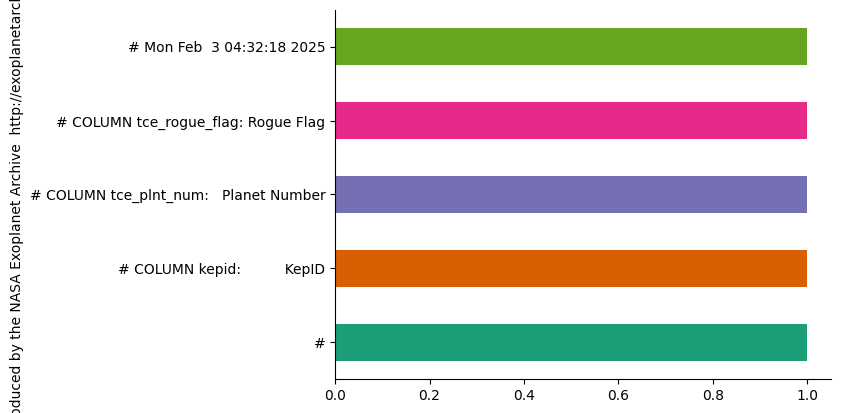

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(tce.columns)
print(koi.columns)
print(kepler_stellar.columns)

Index(['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu'], dtype='object')
Index(['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu'], dtype='object')
Index(['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu'], dtype='object')


In [ ]:
import pandas as pd


kepler_stellar = pd.read_csv(os.path.join(data_path, "keplerstellar_2025.02.03_04.41.47.csv"),
                              comment='#', on_bad_lines='skip')
stellar_hosts = pd.read_csv(os.path.join(data_path, "STELLARHOSTS_2025.02.03_06.11.17.csv"),
                             comment='#', on_bad_lines='skip')
tce = pd.read_csv(os.path.join(data_path, "q1_q17_dr25_tce_2025.02.03_04.32.18.csv"),
                  comment='#', on_bad_lines='skip')
koi = pd.read_csv(os.path.join(data_path, "q1_q8_koi_2025.02.03_04.12.15.csv"),
                  comment='#', on_bad_lines='skip')
confirmed_planets = pd.read_csv(os.path.join(data_path, "PS_2025.02.03_05.09.36.csv"),
                                 comment='#', on_bad_lines='skip')
koi_fpp = pd.read_csv(os.path.join(data_path, "q1_q17_dr25_koifpp_2025.02.03_06.14.34.csv"),
                      comment='#', on_bad_lines='skip')
toi = pd.read_csv(os.path.join(data_path, "TOI_2025.02.03_06.18.31.csv"),
                  comment='#', on_bad_lines='skip')


print("Kepler Stellar:", kepler_stellar.shape)
print("Stellar Hosts:", stellar_hosts.shape)
print("TCE:", tce.shape)
print("KOI:", koi.shape)
print("Confirmed Planets:", confirmed_planets.shape)
print("KOI FPP:", koi_fpp.shape)
print("TOI:", toi.shape)

print("\nTCE columns:", tce.columns[:5])
print("KOI columns:", koi.columns[:5])

merged = pd.merge(tce, koi, on="kepid", how="left")
merged = pd.merge(merged, koi_fpp[["kepid", "fpp_prob"]], on="kepid", how="left")
merged = pd.merge(merged, kepler_stellar, on="kepid", how="left")

print("\nMerged dataset shape:", merged.shape)
merged.head()

Kepler Stellar: (990244, 33)
Stellar Hosts: (46035, 45)
TCE: (34032, 26)
KOI: (3865, 49)
Confirmed Planets: (38090, 92)
KOI FPP: (8054, 35)
TOI: (7372, 65)

TCE columns: Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err'],
      dtype='object')
KOI columns: Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition'],
      dtype='object')

Merged dataset shape: (225807, 107)


,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,mass_err2,dens,dens_err1,dens_err2,prov_sec,nconfp,nkoi,ntce,st_quarters,st_vet_date
0,2304168,2,0,431.719,0.011803,219.298,0.018384,0.9308,0.03871,13.22,...,NaN,NaN,NaN,NaN,NaN,0,0,6,NaN,2013-03-27 0
1,2304168,2,0,431.719,0.011803,219.298,0.018384,0.9308,0.03871,13.22,...,-0.4114,0.07249,0.1452,-0.02320,DSEP,0,0,0,1.111111e+16,2013-12-03 0
2,2304168,2,0,431.719,0.011803,219.298,0.018384,0.9308,0.03871,13.22,...,-0.4950,0.07249,0.3584,-0.01266,DSEP,0,0,2,1.111111e+16,2017-03-23 0
3,2304168,2,0,431.719,0.011803,219.298,0.018384,0.9308,0.03871,13.22,...,-0.4110,0.07249,0.1452,-0.02320,DSEP,0,0,2,1.111111e+16,2015-01-15 0
4,2304168,2,0,431.719,0.011803,219.298,0.018384,0.9308,0.03871,13.22,...,-0.4950,0.07249,0.3584,-0.01266,DSEP,0,0,0,NaN,2018-01-06 0


In [ ]:
missing = merged.isna().sum()
print(missing[missing > 0].sort_values(ascending=False))

koi_score         225807
koi_fpflag_ec     225807
koi_fpflag_co     225807
koi_fpflag_ss     225807
koi_fpflag_nt     225807
                   ...  
logg_err2           8561
tm_designation       287
kepmag                23
dec_y                  4
ra_y                   4
Length: 69, dtype: int64


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4108
           1       0.97      0.99      0.98     11889

    accuracy                           0.97     15997
   macro avg       0.96      0.95      0.96     15997
weighted avg       0.97      0.97      0.97     15997



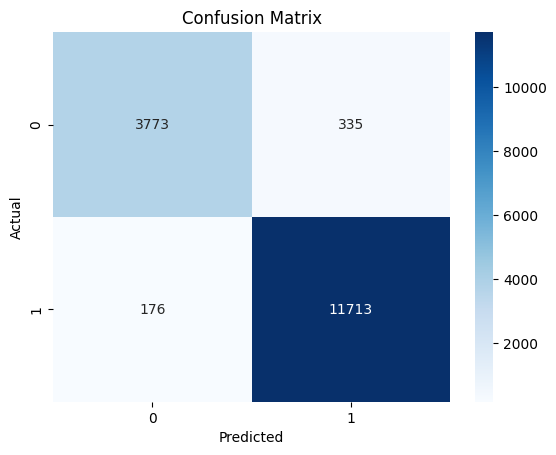

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

merged = merged[merged['fpp_prob'] <= 0.5]

merged['label'] = merged['koi_disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)

features = [
    'tce_period','tce_period_err','tce_rogue_flag','tce_depth','tce_depth_err',
    'tce_duration','tce_duration_err','tce_model_snr','tce_prad','tce_prad_err',
    'radius','mass','teff','logg','feh'
]
X = merged[features].fillna(0)
y = merged['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
# Print all columns as a list
print(list(merged.columns))

['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period', 'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact', 'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth', 'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt', 'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff', 'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius', 'tce_sradius_err', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tc

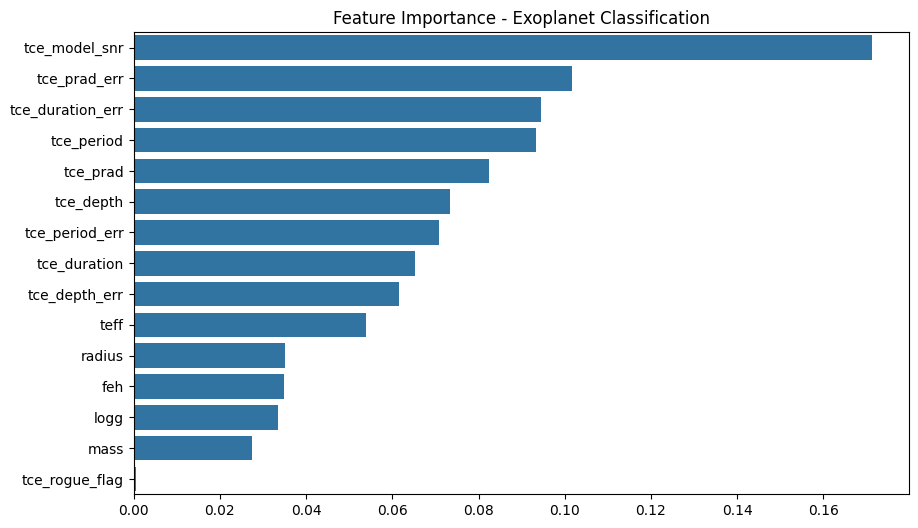

In [ ]:
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.title("Feature Importance - Exoplanet Classification")
plt.show()

List Files in Data Directory

In [ ]:
import pandas as pd


base_path = "/content/drive/MyDrive/Nasa"
tabular_path = f"{base_path}/Archive/merged_dataset.csv"
mendeley_path = f"{base_path}/Lightcurves/lighkurve_KOI_dataset.csv"

tabular_df = pd.read_csv(tabular_path)
mendeley_df = pd.read_csv(mendeley_path)


print("Tabular columns:", tabular_df.columns[:20])
print("Mendeley columns:", mendeley_df.columns[:20])

merged = pd.merge(tabular_df, mendeley_df, on="kepid", how="inner")

print("Merged dataset shape:", merged.shape)
merged.head()

Tabular columns: Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err'],
      dtype='object')
Mendeley columns: Index(['kepid', 'koi_disposition', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_quarters'],
      dtype='object')
Merged dataset shape: (236100, 119)


,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,kepoi_name,kepler_name,koi_disposition_x,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period_x,koi_period_err1_x,koi_period_err2_x,koi_time0bk_x,koi_time0bk_err1_x,koi_time0bk_err2_x,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration_x,koi_duration_err1_x,koi_duration_err2_x,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_x,dec_x,koi_kepmag,fpp_prob,st_delivname,tm_designation,ra_y,dec_y,kepmag,teff,teff_err1,teff_err2,teff_prov,logg,logg_err1,logg_err2,logg_prov,feh,feh_err1,feh_err2,feh_prov,radius,radius_err1,radius_err2,mass,mass_err1,mass_err2,dens,dens_err1,dens_err2,prov_sec,nconfp,nkoi,ntce,st_quarters,st_vet_date,label,koi_disposition_y,koi_period_y,koi_period_err1_y,koi_period_err2_y,koi_time0bk_y,koi_time0bk_err1_y,koi_time0bk_err2_y,koi_duration_y,koi_duration_err1_y,koi_duration_err2_y,koi_quarters
0,2304320,1,0,16.5408,0.000043,133.952,0.002193,0.8848,0.2235,2.715,0.3863,366.7,12.29,30.83,1.763,0.414,570.0,16.6,24.93,2.91,5064.0,101.0,4.57,0.05,0.769,0.049,K02033.01,Kepler-1064 b,CONFIRMED,NOT DISPOSITIONED,NaN,NaN,NaN,NaN,NaN,16.54091,0.00016,-0.00016,133.9492,0.0036,-0.0036,0.76,0.71,-0.71,2.8218,NaN,NaN,371.0,NaN,NaN,1.51,0.6,-0.6,560.0,NaN,NaN,NaN,NaN,NaN,35.1,NaN,NaN,5176.0,63.0,-63.0,4.64,0.3,-0.3,0.71,0.24,-0.24,291.74164,37.688938,13.755,0.000086,q1_q17_dr25_supp_stellar,2MASS J19265799+3741202,291.74164,37.688938,13.755,5064,101.0,-101.0,SPE57,4.572,0.028,-0.048,SPE57,0.00,0.15,-0.15,SPE57,0.769,0.049,-0.038,0.8060,0.0400,-0.0450,2.491,0.2925,-0.3823,DSEP,1,1,0,NaN,2018-01-06 0,1,CONFIRMED,16.540814,0.00004,-0.00004,133.95274,0.002,-0.002,2.5996,0.064,-0.064,11111111111111111000000000000000
1,2304320,1,0,16.5408,0.000043,133.952,0.002193,0.8848,0.2235,2.715,0.3863,366.7,12.29,30.83,1.763,0.414,570.0,16.6,24.93,2.91,5064.0,101.0,4.57,0.05,0.769,0.049,K02033.01,Kepler-1064 b,CONFIRMED,NOT DISPOSITIONED,NaN,NaN,NaN,NaN,NaN,16.54091,0.00016,-0.00016,133.9492,0.0036,-0.0036,0.76,0.71,-0.71,2.8218,NaN,NaN,371.0,NaN,NaN,1.51,0.6,-0.6,560.0,NaN,NaN,NaN,NaN,NaN,35.1,NaN,NaN,5176.0,63.0,-63.0,4.64,0.3,-0.3,0.71,0.24,-0.24,291.74164,37.688938,13.755,0.000086,q1_q17_dr25_stellar,2MASS J19265799+3741202,291.74164,37.688938,13.755,5064,101.0,-101.0,SPE57,4.572,0.028,-0.048,SPE57,0.00,0.15,-0.15,SPE57,0.769,0.049,-0.038,0.8060,0.0400,-0.0450,2.491,0.2925,-0.3823,DSEP,1,1,1,1.111111e+16,2017-03-23 0,1,CONFIRMED,16.540814,0.00004,-0.00004,133.95274,0.002,-0.002,2.5996,0.064,-0.064,11111111111111111000000000000000
2,2304320,1,0,16.5408,0.000043,133.952,0.002193,0.8848,0.2235,2.715,0.3863,366.7,12.29,30.83,1.763,0.414,570.0,16.6,24.93,2.91,5064.0,101.0,4.57,0.05,0.769,0.049,K02033.01,Kepler-1064 b,CONFIRMED,NOT DISPOSITIONED,NaN,NaN,NaN,NaN,NaN,16.54091,0.00016,-0.00016,133.9492,0.0036,-0.0036,0.76,0.71,-0.71,2.8218,NaN,NaN,371.0,NaN,NaN,1.51,0.6,-0.6,560.0,NaN,NaN,NaN,NaN,NaN,35.1,NaN,NaN,5176.0,63.0,-63.0,4.64,0.3,-0.3,0.71,0.24,-0.24,291.74164,37.688938,13.755,0.000086,q1_q12_stellar,2MASS J19265799+3741202,291.74164,37.688938,13.755,5177,64.0,-64.0,Pinsonneault,4.640,0.148,-0.148,Pinsonneault,-0.20,0.00,0.00,Pinsonneault,0.715,0.236,-0.236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,2013-03-27 0,1,CONFIRMED,16.540814,0.00004,-0.00004,133.95274,0.002,-0.002,2.5996,0.064,-0.064,11111111111111111000000000000000
3,2304320,1,0,16.5408,0.000043,133.952,0.002193,0.8848,0.2235,2.715,0.3863,366.7,12.29

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
print(list(merged.columns))

['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period', 'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact', 'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth', 'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt', 'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff', 'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius', 'tce_sradius_err', 'kepoi_name', 'kepler_name', 'koi_disposition_x', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period_x', 'koi_period_err1_x', 'koi_period_err2_x', 'koi_time0bk_x', 'koi_time0bk_err1_x', 'koi_time0bk_err2_x', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_x', 'koi_duration_err1_x', 'koi_duration_err2_x', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tc

In [ ]:
to_drop = [col for col in merged.columns if col.endswith('_y')]
cleaned = merged.drop(columns=to_drop)

cleaned = cleaned.rename(columns={
    "koi_disposition_x": "koi_disposition",
    "koi_period_x": "koi_period",
    "koi_time0bk_x": "koi_time0bk",
    "koi_duration_x": "koi_duration"
})

print("Cleaned dataset shape:", cleaned.shape)
cleaned['label'] = cleaned['koi_disposition'].map({
    "CONFIRMED": 1,
    "CANDIDATE": 1,
    "FALSE POSITIVE": 0
})
import numpy as np
import pandas as pd

df = cleaned.copy()


df['orbital_period_norm'] = np.log1p(df['koi_period'])
df['planet_radius_norm'] = np.log1p(df['koi_prad'])


df['orbital_period_years'] = df['koi_period'] / 365.25
df['semi_major_axis'] = (df['orbital_period_years']**2 * df['mass'])**(1/3)
df['semi_major_axis_scaled'] = (df['semi_major_axis'] - df['semi_major_axis'].mean()) / df['semi_major_axis'].std()


df['star_luminosity'] = (df['koi_srad']**2) * (df['koi_steff']**4)


df['stellar_flux'] = df['star_luminosity'] / (4 * np.pi * (df['semi_major_axis']**2))

df['equilibrium_temp'] = df['koi_steff'] * np.sqrt(df['koi_srad'] / (2 * df['semi_major_axis']))

R_earth, F_earth = 1, 1
df['habitability_index'] = np.exp(-abs(df['koi_prad'] - R_earth) / R_earth) * \
                           np.exp(-abs(df['stellar_flux'] - F_earth) / F_earth)

df = df.drop(columns=['orbital_period_years'])

print("Engineered features added! Shape:", df.shape)
df[['orbital_period_norm','planet_radius_norm','semi_major_axis_scaled',
    'stellar_flux','equilibrium_temp','habitability_index']].head()

missing = df.isna().sum()
print(missing[missing > 0])

Cleaned dataset shape: (236100, 107)


In [ ]:
cleaned['label'] = cleaned['koi_disposition'].map({
    "CONFIRMED": 1,
    "CANDIDATE": 1,
    "FALSE POSITIVE": 0
})

Feature Engineering and Data Cleaning

In [ ]:
import numpy as np
import pandas as pd

df = cleaned.copy()

df['orbital_period_norm'] = np.log1p(df['koi_period'])
df['planet_radius_norm'] = np.log1p(df['koi_prad'])

df['orbital_period_years'] = df['koi_period'] / 365.25
df['semi_major_axis'] = (df['orbital_period_years']**2 * df['mass'])**(1/3)
df['semi_major_axis_scaled'] = (df['semi_major_axis'] - df['semi_major_axis'].mean()) / df['semi_major_axis'].std()

df['star_luminosity'] = (df['koi_srad']**2) * (df['koi_steff']**4)

df['stellar_flux'] = df['star_luminosity'] / (4 * np.pi * (df['semi_major_axis']**2))

df['equilibrium_temp'] = df['koi_steff'] * np.sqrt(df['koi_srad'] / (2 * df['semi_major_axis']))

R_earth, F_earth = 1, 1
df['habitability_index'] = np.exp(-abs(df['koi_prad'] - R_earth) / R_earth) * np.exp(-abs(df['stellar_flux'] - F_earth) / F_earth)

df = df.drop(columns=['orbital_period_years'])

print("Engineered features added! Shape:", df.shape)
df[['orbital_period_norm','planet_radius_norm','semi_major_axis_scaled','stellar_flux','equilibrium_temp','habitability_index']].head()

Engineered features added! Shape: (236100, 115)


,orbital_period_norm,planet_radius_norm,semi_major_axis_scaled,stellar_flux,equilibrium_temp,habitability_index
0,2.864536,0.920283,-0.150758,2.059531e+15,8968.701004,0.0
1,2.864536,0.920283,-0.150758,2.059531e+15,8968.701004,0.0
2,2.864536,0.920283,NaN,NaN,NaN,NaN
3,2.864536,0.920283,-0.151322,2.062945e+15,8972.415523,0.0
4,2.864536,0.920283,-0.184034,2.276201e+15,9195.812420,0.0


In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
print(list(cleaned.columns))

['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period', 'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact', 'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth', 'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt', 'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff', 'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius', 'tce_sradius_err', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1_x', 'koi_period_err2_x', 'koi_time0bk', 'koi_time0bk_err1_x', 'koi_time0bk_err2_x', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1_x', 'koi_duration_err2_x', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_n

Checking Missing Values

In [ ]:
missing = df.isna().sum()
print(missing[missing > 0])

kepoi_name                 17613
kepler_name                31975
koi_disposition            17613
koi_pdisposition           17613
koi_score                 236100
                           ...  
semi_major_axis_scaled     61384
star_luminosity            17613
stellar_flux               61384
equilibrium_temp           61384
habitability_index         61384
Length: 75, dtype: int64


Filling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

num_cols = ['koi_period','koi_prad','mass','koi_srad','koi_steff','orbital_period_norm',
            'planet_radius_norm','semi_major_axis','semi_major_axis_scaled',
            'stellar_flux','equilibrium_temp','habitability_index']

imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['orbital_period_norm','planet_radius_norm','semi_major_axis_scaled',
               'stellar_flux','equilibrium_temp','habitability_index']

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [ ]:
df['label'] = df['koi_disposition'].map({
    "CONFIRMED": 1,
    "CANDIDATE": 1,
    "FALSE POSITIVE": 0
})

Model Comparison and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

features_detect = ['orbital_period_norm','planet_radius_norm','semi_major_axis_scaled',
                   'stellar_flux','equilibrium_temp','habitability_index']


y_detect = df['label']
X_detect = df[features_detect]

nan_mask = y_detect.isna()
X_detect = X_detect[~nan_mask]
y_detect = y_detect[~nan_mask]

X_train, X_test, y_train, y_test = train_test_split(X_detect, y_detect, test_size=0.2, random_state=42)

model_detect = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1)
model_detect.fit(X_train, y_train)

y_pred = model_detect.predict(X_test)
y_proba = model_detect.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85       590
         1.0       1.00      1.00      1.00     41799

    accuracy                           1.00     42389
   macro avg       0.99      0.87      0.92     42389
weighted avg       1.00      1.00      1.00     42389

ROC-AUC: 0.992757672817572


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features_habit = ['orbital_period_norm','semi_major_axis_scaled','mass',
                  'planet_radius_norm','equilibrium_temp']

X_habit = df[features_habit]
y_habit = df['label']

nan_mask = y_habit.isna()
X_habit = X_habit[~nan_mask]
y_habit = y_habit[~nan_mask]

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_habit, y_habit, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_h, y_train_h)
y_pred_lr = lr.predict(X_test_h)

print("Logistic Regression:")
print(classification_report(y_test_h, y_pred_lr))

rf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf.fit(X_train_h, y_train_h)
y_pred_rf = rf.predict(X_test_h)

print("RandomForest:")
print(classification_report(y_test_h, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.07      0.00      0.01       590
         1.0       0.99      1.00      0.99     41799

    accuracy                           0.99     42389
   macro avg       0.53      0.50      0.50     42389
weighted avg       0.97      0.99      0.98     42389

RandomForest:
              precision    recall  f1-score   support

         0.0       0.96      0.43      0.59       590
         1.0       0.99      1.00      1.00     41799

    accuracy                           0.99     42389
   macro avg       0.98      0.71      0.79     42389
weighted avg       0.99      0.99      0.99     42389



DATASET INFORMATION
Total samples: 211942
Training samples: 169553
Testing samples: 42389
Habitable planets: 208945 (98.59%)
Non-habitable planets: 2997 (1.41%)

LOGISTIC REGRESSION MODEL

Classification Report:
              precision    recall  f1-score   support

         0.0     0.1786    0.0083    0.0159       599
         1.0     0.9860    0.9994    0.9927     41790

    accuracy                         0.9854     42389
   macro avg     0.5823    0.5039    0.5043     42389
weighted avg     0.9746    0.9854    0.9789     42389


Training Accuracy: 0.9852
Testing Accuracy: 0.9854

RANDOM FOREST MODEL

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9722    0.4090    0.5758       599
         1.0     0.9916    0.9998    0.9957     41790

    accuracy                         0.9915     42389
   macro avg     0.9819    0.7044    0.7857     42389
weighted avg     0.9913    0.9915    0.9898     42389


Training Accuracy: 0.9912
Testing Ac

/tmp/ipython-input-500081774.py:272: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


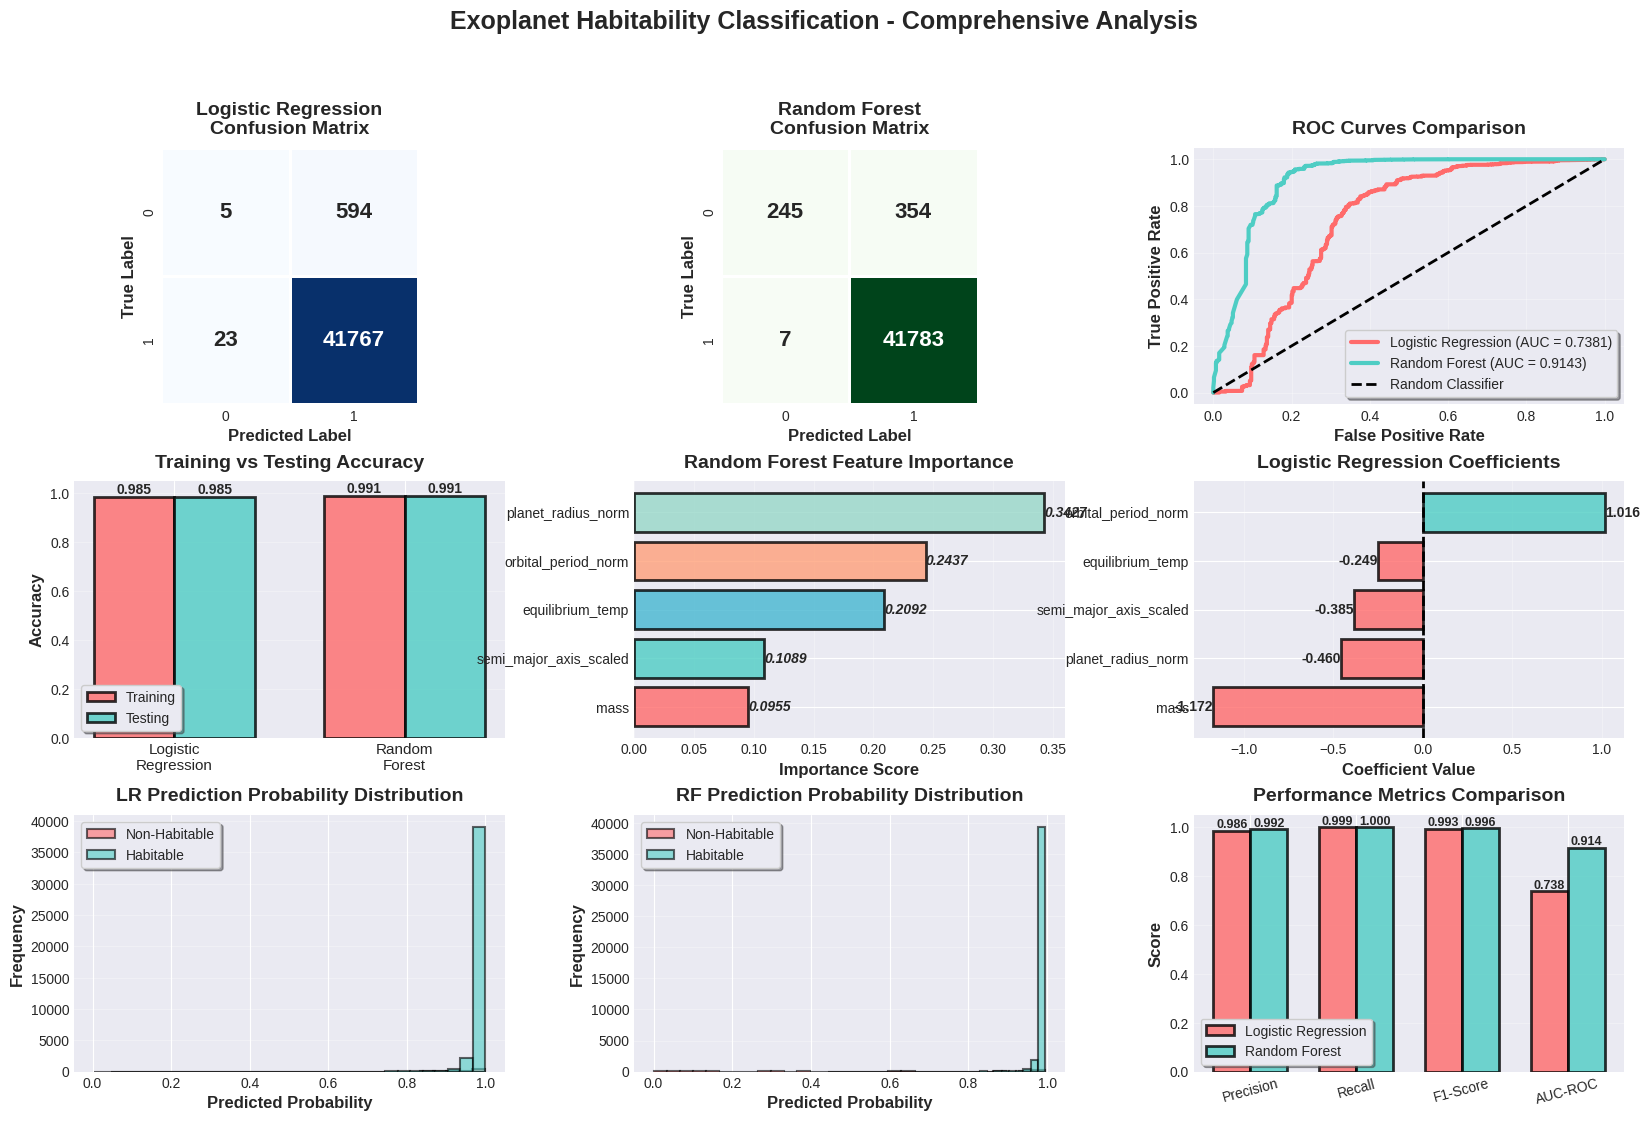


MODEL COMPARISON SUMMARY
              Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  AUC-ROC
Logistic Regression        0.985244       0.985444   0.985978 0.999450  0.992668 0.738106
      Random Forest        0.991230       0.991484   0.991599 0.999832  0.995699 0.914333


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

features_habit = ['orbital_period_norm', 'semi_major_axis_scaled', 'mass',
                  'planet_radius_norm', 'equilibrium_temp']

X_habit = df[features_habit]
y_habit = df['label']

nan_mask = y_habit.isna()
X_habit = X_habit[~nan_mask]
y_habit = y_habit[~nan_mask]

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_habit, y_habit, test_size=0.2, random_state=42, stratify=y_habit
)

print("="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Total samples: {len(X_habit)}")
print(f"Training samples: {len(X_train_h)}")
print(f"Testing samples: {len(X_test_h)}")
print(f"Habitable planets: {sum(y_habit == 1)} ({sum(y_habit == 1)/len(y_habit)*100:.2f}%)")
print(f"Non-habitable planets: {sum(y_habit == 0)} ({sum(y_habit == 0)/len(y_habit)*100:.2f}%)")
print("="*70)

print("\n" + "="*70)
print("LOGISTIC REGRESSION MODEL")
print("="*70)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_h, y_train_h)
y_pred_lr = lr.predict(X_test_h)
y_proba_lr = lr.predict_proba(X_test_h)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test_h, y_pred_lr, digits=4))

lr_train_score = lr.score(X_train_h, y_train_h)
lr_test_score = lr.score(X_test_h, y_test_h)
print(f"\nTraining Accuracy: {lr_train_score:.4f}")
print(f"Testing Accuracy: {lr_test_score:.4f}")

print("\n" + "="*70)
print("RANDOM FOREST MODEL")
print("="*70)

rf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf.fit(X_train_h, y_train_h)
y_pred_rf = rf.predict(X_test_h)
y_proba_rf = rf.predict_proba(X_test_h)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test_h, y_pred_rf, digits=4))

rf_train_score = rf.score(X_train_h, y_train_h)
rf_test_score = rf.score(X_test_h, y_test_h)
print(f"\nTraining Accuracy: {rf_train_score:.4f}")
print(f"Testing Accuracy: {rf_test_score:.4f}")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

ax1 = fig.add_subplot(gs[0, 0])
cm_lr = confusion_matrix(y_test_h, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
            square=True, linewidths=2, linecolor='white',
            annot_kws={'size': 16, 'weight': 'bold'})
ax1.set_title('Logistic Regression\nConfusion Matrix', fontsize=14, fontweight='bold', pad=10)
ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')

ax2 = fig.add_subplot(gs[0, 1])
cm_rf = confusion_matrix(y_test_h, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax2,
            square=True, linewidths=2, linecolor='white',
            annot_kws={'size': 16, 'weight': 'bold'})
ax2.set_title('Random Forest\nConfusion Matrix', fontsize=14, fontweight='bold', pad=10)
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')

ax3 = fig.add_subplot(gs[0, 2])
fpr_lr, tpr_lr, _ = roc_curve(y_test_h, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test_h, y_proba_rf)
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

ax3.plot(fpr_lr, tpr_lr, color='#FF6B6B', lw=3,
         label=f'Logistic Regression (AUC = {auc_lr:.4f})')
ax3.plot(fpr_rf, tpr_rf, color='#4ECDC4', lw=3,
         label=f'Random Forest (AUC = {auc_rf:.4f})')
ax3.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
ax3.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax3.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax3.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold', pad=10)
ax3.legend(loc='lower right', fontsize=10, frameon=True, shadow=True)
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[1, 0])
models = ['Logistic\nRegression', 'Random\nForest']
train_scores = [lr_train_score, rf_train_score]
test_scores = [lr_test_score, rf_test_score]

x = np.arange(len(models))
width = 0.35

bars1 = ax4.bar(x - width/2, train_scores, width, label='Training',
                color='#FF6B6B', alpha=0.8, edgecolor='black', linewidth=2)
bars2 = ax4.bar(x + width/2, test_scores, width, label='Testing',
                color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=2)

ax4.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax4.set_title('Training vs Testing Accuracy', fontsize=14, fontweight='bold', pad=10)
ax4.set_xticks(x)
ax4.set_xticklabels(models, fontsize=11)
ax4.legend(fontsize=10, frameon=True, shadow=True)
ax4.set_ylim([0, 1.05])
ax4.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

ax5 = fig.add_subplot(gs[1, 1])
feature_importance = pd.DataFrame({
    'feature': features_habit,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

bars = ax5.barh(feature_importance['feature'], feature_importance['importance'],
                color=colors, edgecolor='black', linewidth=2, alpha=0.8)
ax5.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax5.set_title('Random Forest Feature Importance', fontsize=14, fontweight='bold', pad=10)
ax5.grid(True, alpha=0.3, axis='x')

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax5.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.4f}', ha='left', va='center',
            fontweight='bold', fontsize=10, style='italic')

ax6 = fig.add_subplot(gs[1, 2])
coef_df = pd.DataFrame({
    'feature': features_habit,
    'coefficient': lr.coef_[0]
}).sort_values('coefficient', ascending=True)

colors_coef = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in coef_df['coefficient']]
bars = ax6.barh(coef_df['feature'], coef_df['coefficient'],
                color=colors_coef, edgecolor='black', linewidth=2, alpha=0.8)
ax6.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax6.set_title('Logistic Regression Coefficients', fontsize=14, fontweight='bold', pad=10)
ax6.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax6.grid(True, alpha=0.3, axis='x')

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax6.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}', ha='left' if width > 0 else 'right',
            va='center', fontweight='bold', fontsize=10)

ax7 = fig.add_subplot(gs[2, 0])
ax7.hist(y_proba_lr[y_test_h == 0], bins=30, alpha=0.6, label='Non-Habitable',
         color='#FF6B6B', edgecolor='black', linewidth=1.5)
ax7.hist(y_proba_lr[y_test_h == 1], bins=30, alpha=0.6, label='Habitable',
         color='#4ECDC4', edgecolor='black', linewidth=1.5)
ax7.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
ax7.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax7.set_title('LR Prediction Probability Distribution', fontsize=14, fontweight='bold', pad=10)
ax7.legend(fontsize=10, frameon=True, shadow=True)
ax7.grid(True, alpha=0.3, axis='y')

ax8 = fig.add_subplot(gs[2, 1])
ax8.hist(y_proba_rf[y_test_h == 0], bins=30, alpha=0.6, label='Non-Habitable',
         color='#FF6B6B', edgecolor='black', linewidth=1.5)
ax8.hist(y_proba_rf[y_test_h == 1], bins=30, alpha=0.6, label='Habitable',
         color='#4ECDC4', edgecolor='black', linewidth=1.5)
ax8.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
ax8.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax8.set_title('RF Prediction Probability Distribution', fontsize=14, fontweight='bold', pad=10)
ax8.legend(fontsize=10, frameon=True, shadow=True)
ax8.grid(True, alpha=0.3, axis='y')

ax9 = fig.add_subplot(gs[2, 2])
from sklearn.metrics import precision_score, recall_score, f1_score

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Logistic Regression': [
        precision_score(y_test_h, y_pred_lr),
        recall_score(y_test_h, y_pred_lr),
        f1_score(y_test_h, y_pred_lr),
        auc_lr
    ],
    'Random Forest': [
        precision_score(y_test_h, y_pred_rf),
        recall_score(y_test_h, y_pred_rf),
        f1_score(y_test_h, y_pred_rf),
        auc_rf
    ]
}

x = np.arange(len(metrics_data['Metric']))
width = 0.35

bars1 = ax9.bar(x - width/2, metrics_data['Logistic Regression'], width,
                label='Logistic Regression', color='#FF6B6B', alpha=0.8,
                edgecolor='black', linewidth=2)
bars2 = ax9.bar(x + width/2, metrics_data['Random Forest'], width,
                label='Random Forest', color='#4ECDC4', alpha=0.8,
                edgecolor='black', linewidth=2)

ax9.set_ylabel('Score', fontsize=12, fontweight='bold')
ax9.set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold', pad=10)
ax9.set_xticks(x)
ax9.set_xticklabels(metrics_data['Metric'], fontsize=10, rotation=15)
ax9.legend(fontsize=10, frameon=True, shadow=True)
ax9.set_ylim([0, 1.05])
ax9.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax9.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom',
                fontweight='bold', fontsize=9)

plt.suptitle('Exoplanet Habitability Classification - Comprehensive Analysis',
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Train Accuracy': [lr_train_score, rf_train_score],
    'Test Accuracy': [lr_test_score, rf_test_score],
    'Precision': [precision_score(y_test_h, y_pred_lr), precision_score(y_test_h, y_pred_rf)],
    'Recall': [recall_score(y_test_h, y_pred_lr), recall_score(y_test_h, y_pred_rf)],
    'F1-Score': [f1_score(y_test_h, y_pred_lr), f1_score(y_test_h, y_pred_rf)],
    'AUC-ROC': [auc_lr, auc_rf]
})

print(summary_df.to_string(index=False))
print("="*70)

Data Preprocessing and Class Balancing

INITIAL DATASET
Cleaned dataset shape: (236100, 107)

Disposition counts:
koi_disposition
CONFIRMED            204080
NOT DISPOSITIONED      6545
CANDIDATE              4865
FALSE POSITIVE         2997
Name: count, dtype: int64

⚠️  IMPROVED LABELING STRATEGY

📊 Label Distribution Comparison:

Conservative Approach (CONFIRMED only):
label_conservative
1.0    204080
0.0     14407
Name: count, dtype: int64
Class ratio: 14.1653

Optimistic Approach (CONFIRMED + CANDIDATE):
label_optimistic
1.0    208945
0.0      9542
Name: count, dtype: int64
Class ratio: 21.8974

💡 RECOMMENDATION: Use 'label_conservative' for more realistic results

FEATURE ENGINEERING
✓ Dropped 16 columns with 100% missing values
✓ Engineered features added! Shape: (236100, 104)
✓ New features: orbital_period_norm, planet_radius_norm, semi_major_axis_scaled,
                stellar_flux, equilibrium_temp, habitability_index, hz_distance, density_proxy

MISSING VALUE ANALYSIS
                Column  Missing_Count  Missin

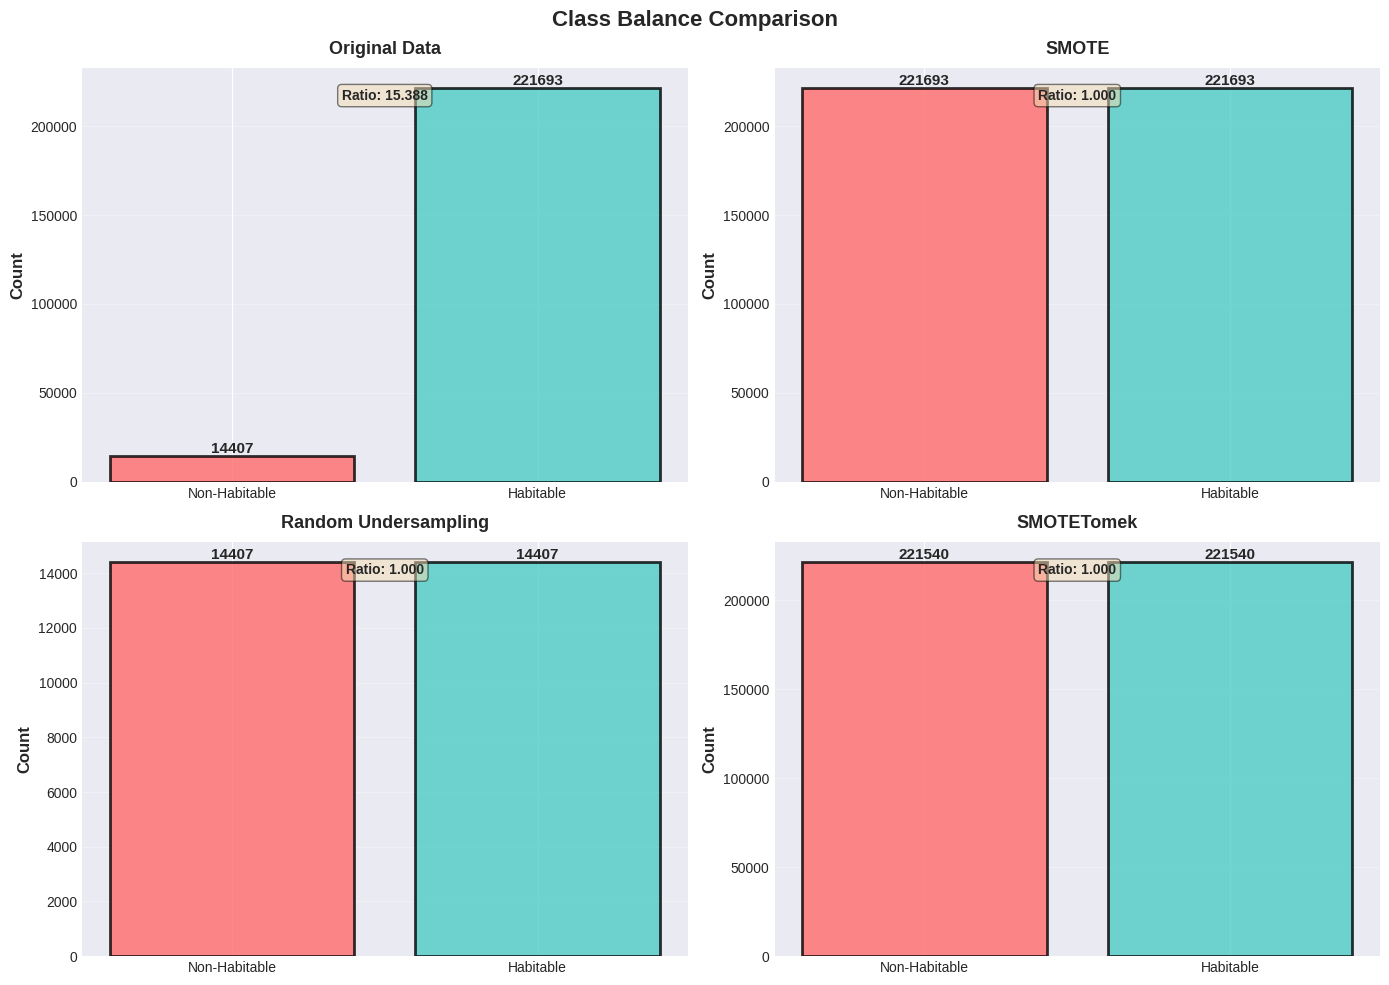

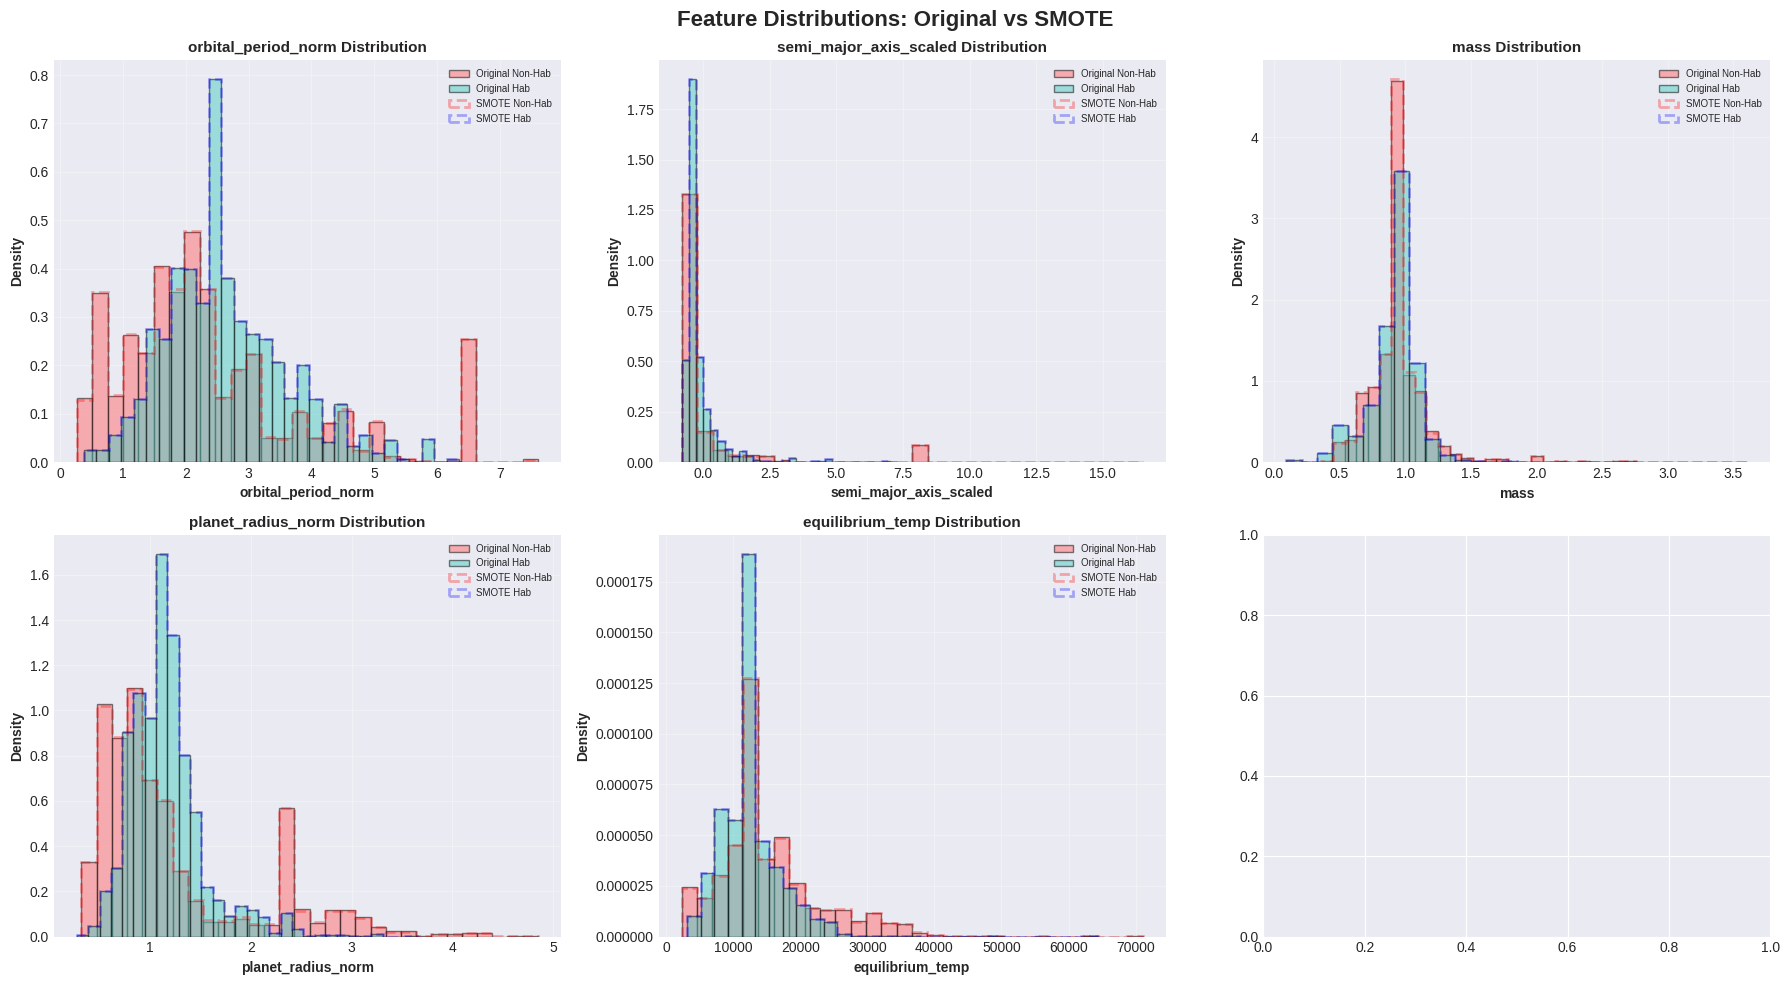


✅ PREPROCESSING COMPLETE!

🎯 NEXT STEPS:
1. Choose a dataset: df = df_smote  # Recommended
2. Run the improved classification models
3. Compare results with original imbalanced data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

to_drop = [col for col in merged.columns if col.endswith('_y')]
cleaned = merged.drop(columns=to_drop, errors='ignore')

cleaned = cleaned.rename(columns={
    "koi_disposition_x": "koi_disposition",
    "koi_period_x": "koi_period",
    "koi_time0bk_x": "koi_time0bk",
    "koi_duration_x": "koi_duration"
})

print("="*80)
print("INITIAL DATASET")
print("="*80)
print(f"Cleaned dataset shape: {cleaned.shape}")
print(f"\nDisposition counts:")
print(cleaned['koi_disposition'].value_counts())

print("\n" + "="*80)
print("⚠️  IMPROVED LABELING STRATEGY")
print("="*80)

cleaned['label_conservative'] = cleaned['koi_disposition'].map({
    "CONFIRMED": 1,
    "CANDIDATE": 0,
    "FALSE POSITIVE": 0,
    "NOT DISPOSITIONED": 0
})

cleaned['label_optimistic'] = cleaned['koi_disposition'].map({
    "CONFIRMED": 1,
    "CANDIDATE": 1,
    "FALSE POSITIVE": 0,
    "NOT DISPOSITIONED": 0
})

cleaned['label_multiclass'] = cleaned['koi_disposition'].map({
    "CONFIRMED": 2,
    "CANDIDATE": 1,
    "FALSE POSITIVE": 0,
    "NOT DISPOSITIONED": 0
})

print("\n📊 Label Distribution Comparison:")
print("\nConservative Approach (CONFIRMED only):")
print(cleaned['label_conservative'].value_counts())
print(f"Class ratio: {cleaned['label_conservative'].value_counts()[1] / cleaned['label_conservative'].value_counts()[0]:.4f}")

print("\nOptimistic Approach (CONFIRMED + CANDIDATE):")
print(cleaned['label_optimistic'].value_counts())
print(f"Class ratio: {cleaned['label_optimistic'].value_counts()[1] / cleaned['label_optimistic'].value_counts()[0]:.4f}")

print("\n💡 RECOMMENDATION: Use 'label_conservative' for more realistic results")
print("="*80)

cleaned['label'] = cleaned['label_conservative']

df = cleaned.copy()

print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)

df['orbital_period_norm'] = np.log1p(df['koi_period'])
df['planet_radius_norm'] = np.log1p(df['koi_prad'])

df['orbital_period_years'] = df['koi_period'] / 365.25
df['semi_major_axis'] = (df['orbital_period_years']**2 * df['mass'])**(1/3)
df['semi_major_axis_scaled'] = (df['semi_major_axis'] - df['semi_major_axis'].mean()) / df['semi_major_axis'].std()

df['star_luminosity'] = (df['koi_srad']**2) * (df['koi_steff']**4)

df['stellar_flux'] = df['star_luminosity'] / (4 * np.pi * (df['semi_major_axis']**2))

df['equilibrium_temp'] = df['koi_steff'] * np.sqrt(df['koi_srad'] / (2 * df['semi_major_axis']))

R_earth, F_earth = 1, 1
df['habitability_index'] = np.exp(-abs(df['koi_prad'] - R_earth) / R_earth) * \
                           np.exp(-abs(df['stellar_flux'] - F_earth) / F_earth)

df['hz_distance'] = np.abs(df['equilibrium_temp'] - 288)
df['density_proxy'] = df['mass'] / (df['koi_prad']**3)

if 'koi_eccen' in df.columns:
    df['eccentricity'] = df['koi_eccen'].fillna(0)

df = df.drop(columns=['orbital_period_years'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)

fully_missing_cols = [
    'koi_fpflag_co', 'koi_fpflag_ss', 'koi_fpflag_nt', 'koi_score', 'koi_fpflag_ec',
    'koi_insol_err2', 'koi_tce_delivname', 'koi_tce_plnt_num', 'koi_insol_err1',
    'koi_insol', 'koi_teq_err2', 'koi_teq_err1', 'koi_duration_err2_x',
    'koi_depth_err1', 'koi_depth_err2', 'koi_duration_err1_x'
]
df = df.drop(columns=[col for col in fully_missing_cols if col in df.columns], errors='ignore')

print(f"✓ Dropped {len(fully_missing_cols)} columns with 100% missing values")
print(f"✓ Engineered features added! Shape: {df.shape}")
print(f"✓ New features: orbital_period_norm, planet_radius_norm, semi_major_axis_scaled,")
print(f"                stellar_flux, equilibrium_temp, habitability_index, hz_distance, density_proxy")

print("\n" + "="*80)
print("MISSING VALUE ANALYSIS")
print("="*80)

missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found!")

print("\n" + "="*80)
print("HANDLING MISSING VALUES")
print("="*80)

non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")

numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col in df.columns]

print(f"Numeric columns before imputation: {len(numerical_cols)} columns")

imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(df[numerical_cols])
df_imputed = pd.DataFrame(imputed_data, columns=numerical_cols, index=df.index)

df[numerical_cols] = df_imputed

if df[numerical_cols].isna().sum().sum() > 0:
    print("Warning: Some NaN values remain after imputation!")
else:
    print("✓ Missing values imputed with median strategy")
print(f"✓ DataFrame shape after imputation: {df.shape}")

print("\n" + "="*80)
print("OUTLIER DETECTION")
print("="*80)

features_to_check = ['orbital_period_norm', 'planet_radius_norm', 'mass',
                     'equilibrium_temp', 'stellar_flux', 'habitability_index']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

print("\nOutliers detected (using 3*IQR method):")
for col in features_to_check:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        pct = (outliers / len(df)) * 100
        print(f"  {col}: {outliers} ({pct:.2f}%) - Range: [{lower:.2f}, {upper:.2f}]")

print("\n✓ Note: Keeping outliers as they may contain valid extreme cases")
print("  Consider capping if specific features show >10% outliers")

print("\n" + "="*80)
print("CLASS BALANCING STRATEGIES")
print("="*80)

features_habit = ['orbital_period_norm', 'semi_major_axis_scaled', 'mass',
                  'planet_radius_norm', 'equilibrium_temp']

missing_features = [f for f in features_habit if f not in df.columns]
if missing_features:
    raise ValueError(f"Missing features: {missing_features}")

X = df[features_habit].copy()
y = df['label'].copy()

nan_mask = y.isna()
X = X[~nan_mask]
y = y[~nan_mask]

print(f"\nOriginal class distribution:")
print(f"  Class 0 (Non-Habitable): {(y == 0).sum()}")
print(f"  Class 1 (Habitable): {(y == 1).sum()}")
print(f"  Ratio (1/0): {(y == 1).sum() / (y == 0).sum():.4f}")

print("\n1️⃣  SMOTE Resampling:")
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print(f"   After SMOTE: Class 0: {(y_smote == 0).sum()}, Class 1: {(y_smote == 1).sum()}")

print("\n2️⃣  Random Undersampling:")
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print(f"   After RUS: Class 0: {(y_rus == 0).sum()}, Class 1: {(y_rus == 1).sum()}")

print("\n3️⃣  SMOTETomek (Hybrid):")
smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X, y)
print(f"   After SMOTETomek: Class 0: {(y_smt == 0).sum()}, Class 1: {(y_smt == 1).sum()}")

df_original = df.copy()
df_smote = pd.DataFrame(X_smote, columns=features_habit)
df_smote['label'] = y_smote

print("\n" + "="*80)
print("💾 AVAILABLE DATASETS")
print("="*80)
print("1. df_original  - Original imbalanced data")
print("2. df_smote     - SMOTE balanced data (RECOMMENDED)")
print("3. X_rus, y_rus - Random undersampled data")
print("4. X_smt, y_smt - SMOTETomek balanced data")
print("\n💡 Use: df = df_smote  # for balanced training")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Class Balance Comparison', fontsize=16, fontweight='bold')

datasets = [
    (y, 'Original Data'),
    (y_smote, 'SMOTE'),
    (y_rus, 'Random Undersampling'),
    (y_smt, 'SMOTETomek')
]

for idx, (data, title) in enumerate(datasets):
    ax = axes[idx // 2, idx % 2]
    counts = pd.Series(data).value_counts()
    colors = ['#FF6B6B', '#4ECDC4']
    bars = ax.bar(['Non-Habitable', 'Habitable'],
                   [counts.get(0, 0), counts.get(1, 0)],
                   color=colors, edgecolor='black', linewidth=2, alpha=0.8)

    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3, axis='y')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

    ratio = counts.get(1, 0) / counts.get(0, 1) if counts.get(0, 0) > 0 else 0
    ax.text(0.5, 0.95, f'Ratio: {ratio:.3f}',
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

fig2, axes = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Feature Distributions: Original vs SMOTE', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features_habit):
    if idx < 6:
        ax = axes[idx // 3, idx % 3]

        ax.hist(X[y == 0][feature], bins=30, alpha=0.5, label='Original Non-Hab',
                color='#FF6B6B', edgecolor='black', density=True)
        ax.hist(X[y == 1][feature], bins=30, alpha=0.5, label='Original Hab',
                color='#4ECDC4', edgecolor='black', density=True)

        ax.hist(X_smote[y_smote == 0][feature], bins=30, alpha=0.3,
                label='SMOTE Non-Hab', color='red', linestyle='--',
                histtype='step', linewidth=2, density=True)
        ax.hist(X_smote[y_smote == 1][feature], bins=30, alpha=0.3,
                label='SMOTE Hab', color='blue', linestyle='--',
                histtype='step', linewidth=2, density=True)

        ax.set_xlabel(feature, fontsize=10, fontweight='bold')
        ax.set_ylabel('Density', fontsize=10, fontweight='bold')
        ax.set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
        ax.legend(fontsize=7)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ PREPROCESSING COMPLETE!")
print("="*80)
print("\n🎯 NEXT STEPS:")
print("1. Choose a dataset: df = df_smote  # Recommended")
print("2. Run the improved classification models")
print("3. Compare results with original imbalanced data")
print("="*80)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

features_habit = ['orbital_period_norm', 'semi_major_axis_scaled', 'mass', 'planet_radius_norm', 'equilibrium_temp']
X_habit = df_smote[features_habit]
y_habit = df_smote['label']

if X_habit.isna().sum().sum() > 0 or y_habit.isna().sum() > 0:
    raise ValueError("NaN values detected in X_habit or y_habit. Ensure preprocessing completed correctly.")

print("="*80)
print("⚠️  DATA QUALITY CHECK - CLASS IMBALANCE ANALYSIS")
print("="*80)
class_counts = y_habit.value_counts()
class_ratio = class_counts[1] / class_counts[0] if 0 in class_counts.index and class_counts[0] > 0 else 0
print(f"Non-Habitable (0): {class_counts.get(0, 0)} samples ({class_counts.get(0, 0)/len(y_habit)*100:.2f}%)")
print(f"Habitable (1): {class_counts.get(1, 0)} samples ({class_counts.get(1, 0)/len(y_habit)*100:.2f}%)")
print(f"Class Ratio (Habitable/Non-Habitable): {class_ratio:.4f}")

if class_ratio > 10 or class_ratio < 0.1:
    print("\n🚨 SEVERE CLASS IMBALANCE DETECTED!")
    print("   Using SMOTE-balanced dataset to mitigate imbalance.")
    print("   Focus on:")
    print("   - Balanced Accuracy")
    print("   - F1-Score for minority class")
    print("   - Precision-Recall curve instead of ROC")

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_habit, y_habit, test_size=0.2, random_state=42, stratify=y_habit
)

print(f"\nTraining samples: {len(X_train_h)}")
print(f"Testing samples: {len(X_test_h)}")
print("="*80)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 7, 10],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7]
    }
}

results = {}
predictions = {}
probabilities = {}

print("\n" + "="*80)
print("TRAINING AND EVALUATING MODELS")
print("="*80)

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"🤖 {name}")
    print(f"{'='*80}")

    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
        grid_search.fit(X_train_h, y_train_h)
        model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")

    model.fit(X_train_h, y_train_h)

    y_pred = model.predict(X_test_h)
    y_proba = model.predict_proba(X_test_h)[:, 1] if hasattr(model, 'predict_proba') else None

    predictions[name] = y_pred
    probabilities[name] = y_proba

    train_acc = accuracy_score(y_train_h, model.predict(X_train_h))
    test_acc = accuracy_score(y_test_h, y_pred)
    balanced_acc = balanced_accuracy_score(y_test_h, y_pred)

    report = classification_report(y_test_h, y_pred, output_dict=True, zero_division=0, labels=[0, 1])

    precision_habitable = report['1']['precision']
    recall_habitable = report['1']['recall']
    f1_habitable = report['1']['f1-score']

    precision_non_habitable = report['0']['precision']
    recall_non_habitable = report['0']['recall']
    f1_non_habitable = report['0']['f1-score']

    auc_score = roc_auc_score(y_test_h, y_proba) if y_proba is not None else np.nan

    cv_scores = cross_val_score(model, X_train_h, y_train_h, cv=5, scoring='f1')

    results[name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Balanced Accuracy': balanced_acc,
        'Precision (Habitable)': precision_habitable,
        'Recall (Habitable)': recall_habitable,
        'F1-Score (Habitable)': f1_habitable,
        'Precision (Non-Hab)': precision_non_habitable,
        'Recall (Non-Hab)': recall_non_habitable,
        'F1-Score (Non-Hab)': f1_non_habitable,
        'AUC-ROC': auc_score,
        'CV F1-Score (mean)': cv_scores.mean(),
        'CV F1-Score (std)': cv_scores.std()
    }

    print(f"\n📊 Performance Metrics:")
    print(f"   Train Accuracy: {train_acc:.4f}")
    print(f"   Test Accuracy:  {test_acc:.4f}")
    print(f"   Balanced Accuracy: {balanced_acc:.4f}")
    print(f"   Overfitting Gap: {abs(train_acc - test_acc):.4f}")
    print(f"\n   Class 0 (Non-Habitable) - Precision: {precision_non_habitable:.4f}, Recall: {recall_non_habitable:.4f}, F1: {f1_non_habitable:.4f}")
    print(f"   Class 1 (Habitable)     - Precision: {precision_habitable:.4f}, Recall: {recall_habitable:.4f}, F1: {f1_habitable:.4f}")
    print(f"\n   AUC-ROC: {auc_score:.4f}" if not np.isnan(auc_score) else "   AUC-ROC: N/A")
    print(f"   CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('F1-Score (Habitable)', ascending=False)

print("\n" + "="*80)
print("📈 MODEL COMPARISON SUMMARY (Sorted by F1-Score for Habitable Class)")
print("="*80)
print(results_df.to_string())
print("="*80)

fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(5, 4, hspace=0.4, wspace=0.3)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']

ax1 = fig.add_subplot(gs[0, 0])
model_names = results_df.index
test_accs = results_df['Test Accuracy']
bars = ax1.barh(model_names, test_accs, color=colors[:len(model_names)], edgecolor='black', linewidth=2, alpha=0.85)
ax1.set_xlabel('Test Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Model Test Accuracy Comparison', fontsize=13, fontweight='bold', pad=10)
ax1.set_xlim([0, 1.05])
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2., f'{width:.4f}', ha='left', va='center', fontweight='bold', fontsize=9)
ax1.grid(True, alpha=0.3, axis='x')

ax2 = fig.add_subplot(gs[0, 1])
x_pos = np.arange(len(model_names))
width = 0.35
bars1 = ax2.bar(x_pos - width/2, results_df['F1-Score (Non-Hab)'], width, label='Non-Habitable', color='#FF6B6B', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos + width/2, results_df['F1-Score (Habitable)'], width, label='Habitable', color='#4ECDC4', alpha=0.8, edgecolor='black')
ax2.set_ylabel('F1-Score', fontsize=11, fontweight='bold')
ax2.set_title('F1-Score by Class', fontsize=13, fontweight='bold', pad=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(model_names, rotation=45, ha='right', fontsize=8)
ax2.legend(fontsize=9, frameon=True, shadow=True)
ax2.set_ylim([0, 1.05])
ax2.grid(True, alpha=0.3, axis='y')

ax3 = fig.add_subplot(gs[0, 2])
for i, (name, y_proba) in enumerate(probabilities.items()):
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test_h, y_proba)
        auc_score = auc(fpr, tpr)
        ax3.plot(fpr, tpr, lw=2.5, label=f'{name} (AUC={auc_score:.3f})', color=colors[i % len(colors)], alpha=0.8)
ax3.plot([0, 1], [0, 1], 'k--', lw=2, label='Random', alpha=0.5)
ax3.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
ax3.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
ax3.set_title('ROC Curves - All Models', fontsize=13, fontweight='bold', pad=10)
ax3.legend(loc='lower right', fontsize=7, frameon=True, shadow=True)
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[0, 3])
train_accs = results_df['Train Accuracy']
test_accs = results_df['Test Accuracy']
x_pos = np.arange(len(model_names))
width = 0.35
bars1 = ax4.bar(x_pos - width/2, train_accs, width, label='Train', color='#FF6B6B', alpha=0.8, edgecolor='black')
bars2 = ax4.bar(x_pos + width/2, test_accs, width, label='Test', color='#4ECDC4', alpha=0.8, edgecolor='black')
ax4.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax4.set_title('Overfitting Analysis', fontsize=13, fontweight='bold', pad=10)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(model_names, rotation=45, ha='right', fontsize=8)
ax4.legend(fontsize=9, frameon=True, shadow=True)
ax4.set_ylim([0, 1.05])
ax4.grid(True, alpha=0.3, axis='y')

ax5 = fig.add_subplot(gs[1, 0])
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    if hasattr(rf_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': features_habit,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=True)
        bars = ax5.barh(feature_importance['feature'], feature_importance['importance'], color=colors, edgecolor='black', linewidth=2, alpha=0.8)
        ax5.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
        ax5.set_title('🔍 XAI: Random Forest Feature Importance', fontsize=13, fontweight='bold', pad=10)
        ax5.grid(True, alpha=0.3, axis='x')
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax5.text(width + 0.005, bar.get_y() + bar.get_height()/2., f'{width:.4f}', ha='left', va='center', fontweight='bold', fontsize=9)
    else:
        ax5.text(0.5, 0.5, 'Random Forest model not trained', horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
        ax5.set_title('🔍 XAI: Random Forest Feature Importance', fontsize=13, fontweight='bold', pad=10)
else:
    ax5.text(0.5, 0.5, 'Random Forest model not in dictionary', horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
    ax5.set_title('🔍 XAI: Random Forest Feature Importance', fontsize=13, fontweight='bold', pad=10)

ax6 = fig.add_subplot(gs[1, 1])
if 'Random Forest' in models and hasattr(models['Random Forest'], 'feature_importances_'):
    rf_model = models['Random Forest']
    perm_importance = permutation_importance(rf_model, X_test_h, y_test_h, n_repeats=10, random_state=42, n_jobs=-1)
    perm_df = pd.DataFrame({
        'feature': features_habit,
        'importance': perm_importance.importances_mean,
        'std': perm_importance.importances_std
    }).sort_values('importance', ascending=True)
    ax6.barh(perm_df['feature'], perm_df['importance'], xerr=perm_df['std'], color=colors, edgecolor='black', linewidth=2, alpha=0.8, error_kw={'linewidth': 2, 'ecolor': 'black'})
    ax6.set_xlabel('Permutation Importance', fontsize=11, fontweight='bold')
    ax6.set_title('🔍 XAI: Permutation Importance (RF)', fontsize=13, fontweight='bold', pad=10)
    ax6.grid(True, alpha=0.3, axis='x')
else:
    ax6.text(0.5, 0.5, 'Random Forest model not trained or not in dictionary', horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
    ax6.set_title('🔍 XAI: Permutation Importance (RF)', fontsize=13, fontweight='bold', pad=10)

ax7 = fig.add_subplot(gs[1, 2])
if 'Logistic Regression' in models:
    lr_model = models['Logistic Regression']
    if hasattr(lr_model, 'coef_'):
        coef_df = pd.DataFrame({
            'feature': features_habit,
            'coefficient': lr_model.coef_[0]
        }).sort_values('coefficient', ascending=True)
        colors_coef = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in coef_df['coefficient']]
        bars = ax7.barh(coef_df['feature'], coef_df['coefficient'], color=colors_coef, edgecolor='black', linewidth=2, alpha=0.8)
        ax7.set_xlabel('Coefficient Value', fontsize=11, fontweight='bold')
        ax7.set_title('🔍 XAI: Logistic Regression Coefficients', fontsize=13, fontweight='bold', pad=10)
        ax7.axvline(x=0, color='black', linestyle='--', linewidth=2)
        ax7.grid(True, alpha=0.3, axis='x')
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax7.text(width, bar.get_y() + bar.get_height()/2., f'{width:.3f}', ha='left' if width > 0 else 'right', va='center', fontweight='bold', fontsize=9)
    else:
        ax7.text(0.5, 0.5, 'Logistic Regression model not trained', horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
        ax7.set_title('🔍 XAI: Logistic Regression Coefficients', fontsize=13, fontweight='bold', pad=10)
else:
    ax7.text(0.5, 0.5, 'Logistic Regression model not in dictionary', horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
    ax7.set_title('🔍 XAI: Logistic Regression Coefficients', fontsize=13, fontweight='bold', pad=10)

ax8 = fig.add_subplot(gs[1, 3])
if 'Decision Tree' in models:
    dt_model = models['Decision Tree']
    if hasattr(dt_model, 'tree_'):
        from sklearn.tree import plot_tree
        plot_tree(dt_model, feature_names=features_habit, class_names=['Non-Hab', 'Habitable'], filled=True, rounded=True, fontsize=7, ax=ax8, max_depth=3)
        ax8.set_title('🔍 XAI: Decision Tree Structure', fontsize=13, fontweight='bold', pad=10)
    else:
        ax8.text(0.5, 0.5, 'Decision Tree model not trained', horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes)
        ax8.set_title('🔍 XAI: Decision Tree Structure', fontsize=13, fontweight='bold', pad=10)
else:
    ax8.text(0.5, 0.5, 'Decision Tree model not in dictionary', horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes)
    ax8.set_title('🔍 XAI: Decision Tree Structure', fontsize=13, fontweight='bold', pad=10)

if 'Random Forest' in models and hasattr(models['Random Forest'], 'feature_importances_'):
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': features_habit,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    top_features = feature_importance['feature'].tolist()[:4]

    for idx, feature in enumerate(top_features):
        ax = fig.add_subplot(gs[2 + idx // 2, idx % 2])
        feature_idx = features_habit.index(feature)
        X_test_sample = X_test_h.sample(min(1000, len(X_test_h)), random_state=42) if len(X_test_h) > 1000 else X_test_h.copy()

        from sklearn.inspection import PartialDependenceDisplay
        display = PartialDependenceDisplay.from_estimator(
            rf_model,
            X_test_sample,
            [feature],
            ax=ax,
            line_kw={'color': colors[idx], 'linewidth': 3, 'alpha': 0.8}
        )
        ax.set_xlabel(feature, fontsize=10, fontweight='bold')
        ax.set_ylabel('Partial Dependence', fontsize=10, fontweight='bold')
        ax.set_title(f'🔍 PDP: {feature}', fontsize=11, fontweight='bold', pad=8)
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0, 1])

else:
    for idx in range(4):
        ax = fig.add_subplot(gs[2 + idx // 2, idx % 2])
        ax.text(0.5, 0.5, 'Random Forest model not trained\nfor PDP', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'🔍 PDP: Feature {idx+1}', fontsize=11, fontweight='bold', pad=8)

if not results_df.empty:
    best_models = results_df.head(4).index.tolist()
    for idx, model_name in enumerate(best_models):
        ax = fig.add_subplot(gs[2 + idx // 2, 2 + idx % 2])
        if model_name in predictions:
            cm = confusion_matrix(y_test_h, predictions[model_name], labels=[0, 1])
            sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', cbar=False, ax=ax, square=True, linewidths=2, linecolor='white', annot_kws={'size': 14, 'weight': 'bold'})
            ax.set_title(f'{model_name}\nConfusion Matrix', fontsize=11, fontweight='bold', pad=8)
            ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')
            ax.set_ylabel('Actual', fontsize=10, fontweight='bold')
            ax.set_xticklabels([0, 1])
            ax.set_yticklabels([0, 1])
        else:
            ax.text(0.5, 0.5, f'Predictions not available\nfor {model_name}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f'{model_name}\nConfusion Matrix', fontsize=11, fontweight='bold', pad=8)
else:
    for idx in range(4):
        ax = fig.add_subplot(gs[2 + idx // 2, 2 + idx % 2])
        ax.text(0.5, 0.5, 'No model results available\nfor Confusion Matrix', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'Model {idx+1}\nConfusion Matrix', fontsize=11, fontweight='bold', pad=8)

plt.suptitle('🌍 Exoplanet Habitability: Multi-Model ML & XAI Analysis', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

fig2, axes = plt.subplots(2, 3, figsize=(18, 12))
fig2.suptitle('🔍 XAI: Feature Interactions Analysis', fontsize=18, fontweight='bold')

if 'Random Forest' in models and hasattr(models['Random Forest'], 'feature_importances_'):
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': features_habit,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    top_3_features = feature_importance['feature'].tolist()[:3]

    interaction_pairs = [
        (top_3_features[0], top_3_features[1]),
        (top_3_features[0], top_3_features[2]),
        (top_3_features[1], top_3_features[2])
    ]

    for idx, (feat1, feat2) in enumerate(interaction_pairs):
        ax = axes[0, idx]
        X_test_sample = X_test_h.sample(min(500, len(X_test_h)), random_state=42) if len(X_test_h) > 500 else X_test_h.copy()

        from sklearn.inspection import PartialDependenceDisplay
        display = PartialDependenceDisplay.from_estimator(
            rf_model,
            X_test_sample,
            [(feat1, feat2)],
            ax=ax,
            cmap='RdYlGn'
        )
        ax.set_xlabel(feat1, fontsize=11, fontweight='bold')
        ax.set_ylabel(feat2, fontsize=11, fontweight='bold')
        ax.set_title(f'Interaction: {feat1} vs {feat2}', fontsize=12, fontweight='bold')

else:
    for idx in range(3):
        ax = axes[0, idx]
        ax.text(0.5, 0.5, 'Random Forest model not trained\nfor Interaction Plot', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'Interaction: Feature {idx*2+1} vs {idx*2+2}', fontsize=12, fontweight='bold')

if not results_df.empty:
    best_models = results_df.head(3).index.tolist()
    for idx in range(3):
        ax = axes[1, idx]
        model_name = best_models[idx] if idx < len(best_models) else None
        if model_name and model_name in probabilities and probabilities[model_name] is not None:
            y_proba = probabilities[model_name]
            ax.hist(y_proba[y_test_h == 0], bins=30, alpha=0.6, label='Non-Habitable (0)', color='#FF6B6B', edgecolor='black', linewidth=1.5, density=True)
            ax.hist(y_proba[y_test_h == 1], bins=30, alpha=0.6, label='Habitable (1)', color='#4ECDC4', edgecolor='black', linewidth=1.5, density=True)
            ax.set_xlabel('Predicted Probability', fontsize=11, fontweight='bold')
            ax.set_ylabel('Density', fontsize=11, fontweight='bold')
            ax.set_title(f'{model_name} Predictions', fontsize=12, fontweight='bold')
            ax.legend(fontsize=9)
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, f'Predictions not available\nfor {model_name if model_name else "Model"}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f'Model {idx+1} Predictions', fontsize=12, fontweight='bold')
else:
    for idx in range(3):
        ax = axes[1, idx]
        ax.text(0.5, 0.5, 'No model results available\nfor Prediction Distribution', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'Model {idx+1} Predictions', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)
print("\n🎯 NEXT STEPS:")
print("1. Select best model based on F1-Score and Balanced Accuracy.")
print("2. Use feature importance insights to refine feature selection.")
print("3. Deploy model or test on new exoplanet data.")
print("="*80)

⚠️  DATA QUALITY CHECK - CLASS IMBALANCE ANALYSIS
Non-Habitable (0): 221693 samples (50.00%)
Habitable (1): 221693 samples (50.00%)
Class Ratio (Habitable/Non-Habitable): 1.0000

Training samples: 354708
Testing samples: 88678

TRAINING AND EVALUATING MODELS

🤖 Logistic Regression

📊 Performance Metrics:
   Train Accuracy: 0.6368
   Test Accuracy:  0.6371
   Balanced Accuracy: 0.6371
   Overfitting Gap: 0.0003

   Class 0 (Non-Habitable) - Precision: 0.6799, Recall: 0.5181, F1: 0.5880
   Class 1 (Habitable)     - Precision: 0.6107, Recall: 0.7561, F1: 0.6757

   AUC-ROC: 0.6656
   CV F1-Score: 0.6755 (+/- 0.0010)

🤖 Random Forest
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

📊 Performance Metrics:
   Train Accuracy: 0.9121
   Test Accuracy:  0.9109
   Balanced Accuracy: 0.9109
   Overfitting Gap: 0.0012

   Class 0 (Non-Habitable) - Precision: 0.9755, Recall: 0.8431, F1: 0.9045
   Class 1 (Habitable)     - Precision: 0.8618, Recall: 0.9788, F1: 0.9166

SHAP Analysis for Exoplanet Detection Model

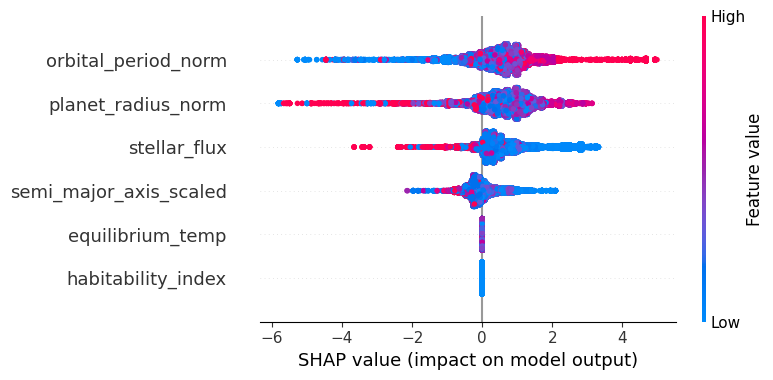

Prediction probability: 0.9939983


In [ ]:
import shap
explainer = shap.TreeExplainer(model_detect)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
sample_idx = 10
print("Prediction probability:", y_proba[sample_idx])
shap.force_plot(explainer.expected_value, shap_values[sample_idx], X_test.iloc[sample_idx])

Sky Map of Detected Exoplanets

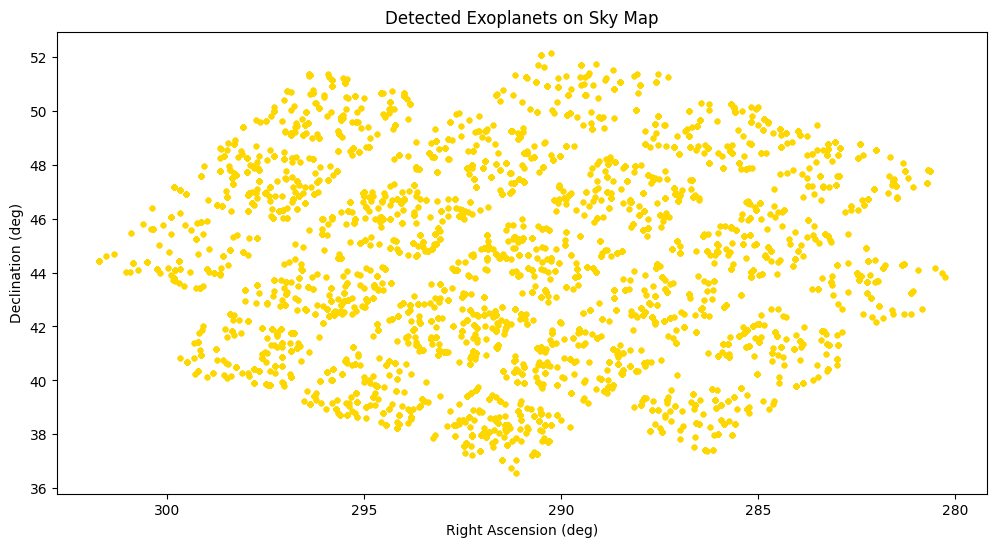

In [ ]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
detected = df[df['label']==1].copy()
detected['ra_x'] = pd.to_numeric(detected['ra_x'], errors='coerce')
detected['dec_x'] = pd.to_numeric(detected['dec_x'], errors='coerce')
detected = detected.dropna(subset=['ra_x','dec_x'])
ra = detected['ra_x'].values
dec = detected['dec_x'].values
coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')

plt.figure(figsize=(12,6))
plt.scatter(coords.ra.degree, coords.dec.degree, c='gold', s=10, alpha=0.7)
plt.gca().invert_xaxis()
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("Detected Exoplanets on Sky Map")
plt.show()